# Mini Projeto 10: Cadeia de Markov Infinita


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random as rnd

## Distribuição Estacionária

Sendo um estado incial $\mu_0 = [e_0, e_1, \ldots, e_n]$ de uma cadeia de Markov cuja probabilidade de transição para um estado $\mu_n = [e'_0, e'_1, \ldots, e'_n]$ é dado por uma matriz $P$, temos a representação:

$$
\mu_n = \mu_0 P^n
$$

No caso limite, onde $n \to \infty$, caso a cadeia de markov apresente uma estacionariedade, temos que

$$
\pi = \pi P
$$

onde $\pi = [\pi_0, \pi_1, \ldots, \pi_n]$ é o vetor que carrega os estados estacionários da cada sítio da cadeia.

Neste sentido, no caso onde temos a seguinte matriz de transição:

$$
P = 
\begin{bmatrix} 
q & p & 0 & 0 & 0 & \ldots & 0 &\\ 
q & 0 & p & 0 & 0 & \ldots & 0 &\\
0 & q & 0 & p & 0 & \ldots & 0 &\\
0 & 0 & q & 0 & p & \ldots & 0 &\\
\end{bmatrix}
$$


obtemos a seguinte sequência de equações

$$
\pi_0 = q \pi_0 + q \pi_1\\
\pi_1 = p \pi_0 + q \pi_2\\
\pi_2 = p \pi_1 + q \pi_3\\
\vdots = \vdots\\
\pi_n = p \pi_{n-1} + q \pi_{n+1}
$$

Como também $p = 1 - q$, temos

$$
\pi_0 (1 - q) = q \pi_1 \implies \pi_1 = \Bigg[\frac{p}{q}\Bigg]\pi_0
$$

$$
\pi_2 = \frac{1}{q}\pi_1 - \frac{p}{q} \pi_0 = \Bigg[\frac{p}{q^2} - \frac{p}{q}\Bigg] \pi_0 = \Bigg[\frac{p - pq}{q^2} \Bigg]\pi_0 = \Bigg[\frac{p (1 - q)}{q^2}\Bigg] \implies \pi_2 = \Bigg[\frac{p}{q}\Bigg]^2 \pi_0
$$

$$
\pi_n = p \Bigg[\frac{p}{q}\Bigg]^{n-1} \pi_0 + q \Bigg[\frac{p}{q}\Bigg]^{n+1} \pi_0 \implies
$$

$$
\pi_n = \pi_0 \Bigg[\frac{p^n}{q^{n-1}} + \frac{p^{n+1}}{q^{n+1}} \Bigg] = \pi_0 \Bigg[\frac{qp^n}{qq^{n}}\Bigg] \implies \pi_n = \Bigg[\frac{p}{q}\Bigg]^n \pi_0
$$

Neste sentido, temos a generalização válida

$$
\pi_n = \Bigg[\frac{p}{q}\Bigg]^n \pi_0
$$

Para que a probabilidade de encontrar um determinado estado ativo seja $1$ quando consideramos todos os possíveis estados $\pi_i \in \pi$, por normalização temos que

$$
\sum_{i=0}^n \pi_i = 1 \implies \sum_{i = 0}^n \Bigg[\frac{p}{q}\Bigg]^i \pi_0 = 1
$$

Para o limite estacionário onde $n \to \infty$, temos uma série geométrica que converge para 

$$
p/q < 1 \implies p < q \implies p < 1 - p \implies 2 p < 1 \implies p < 1/2
$$. 

Logo, $p < 0.5$. Neste caso, a convergência ocorre para o valor 

$$
\frac{1}{\pi_0} = \frac{q}{q-p} \implies \pi_0 = 1 - \frac{p}{q}
$$

Em particular, se considerarmos $p = 0.25$, $\pi_0 = 0.666$m

## Cadeia de Markov infinita

In [205]:
def get_markov_chain(steps, p=0.25, state_one=0, queries=10):
    states = []
    states.append(state_one)
    state_i = state_one
    
    rec_time = [0 for i in range(queries)]
    rec_time[0] = 1
    
    for i in range(steps):
        r = rnd.random()
        if r < p:
            state_i += 1
        else:
            if state_i == 0:
                state_i = 0
            else:
                state_i -= 1
        states.append(state_i)
        
        if state_i < queries:
            rec_time[state_i] += 1
    
    rec_time = [N/rec_time[i] for i in range(len(rec_time))]
    return states, rec_time

In [234]:
def plot_markov_hist(states, bins, p=.25):
    plt.figure(figsize=(16,6))

    h = np.histogram(states, bins=bins)
    plt.bar(h[1][:-1], h[0], label=r'$p = {}$'.format(p))
    plt.ylabel(r'Número de ocorrências', fontsize=13)
    plt.xlabel(r'Estado $e_i$', fontsize=13)
    plt.yscale('log')
    plt.legend()
    plt.show()

In [242]:
def plot_recurrent_time(rec_time):
    h_log = [np.log(i) for i in rec_time]
    slope, intercept, r_value, p_value, std_err = stats.linregress([i for i in range(10)], h_log)
    plt.figure(figsize=(16,6))
    plt.plot(rec_time, '-o', markersize=10, label=r'Experimento, $p=0.25$')
    print("Intercepto = {}".format(intercept))
    print("Inclinação = {}".format(slope))
    plt.plot(np.exp(intercept) * np.exp([i*slope for i in range(10)]), label=r'Regressão: $e^{\alpha + \beta e_i}$')
    plt.ylabel(r'Tempo de recorrência', fontsize=13)
    plt.xlabel(r"Estado $e_i$", fontsize=13)
    plt.yscale('log')
    plt.legend()
    plt.show()

## Resultados para $N = 10^5$

### Número de ocorrências

Distribuição do número de ocorrências de cada estado $e_i \in [0,1,2,3\ldots]$ na cadeia de markov infinita $[0,\infty]$

In [206]:
N = 100000
state_one = 0
queries = 10
states, rec_time = get_markov_chain(steps=100000, p=0.25, state_one=state_one, queries=queries)

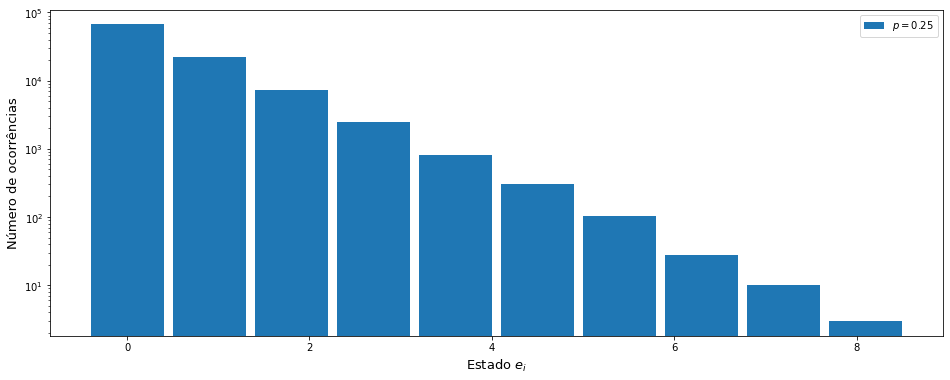

In [236]:
plot_markov_hist(states, bins=10, p=.25)

### Tempo de recorrência

Distribuição do tempo de recorrência de cada estado $e_i \in [0,1,2, \ldots, 10]$ na cadeia de markov

Intercepto = 0.37771546399808376
Inclinação = 1.1052392093817034


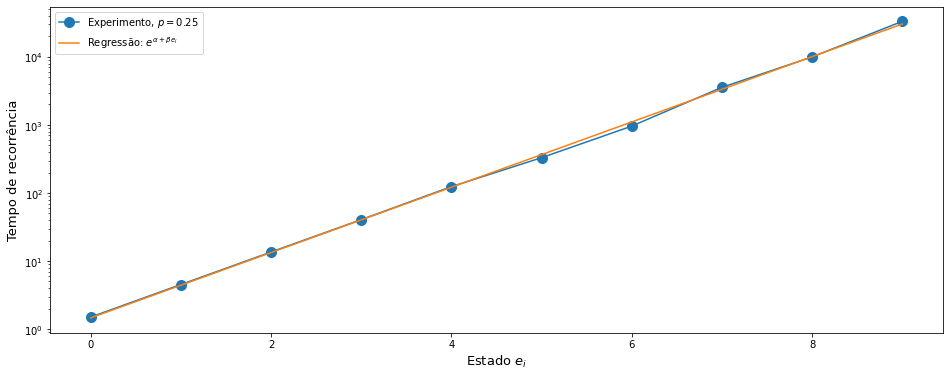

In [243]:
plot_recurrent_time(rec_time)

Com isso, obtemos que o tempo de ocorrência para um dado estado $e_i$ segue uma função exponencial, cuja regressão linear resulta em

$$
f(e_i) = e^\alpha e^{\beta e_i}
$$

com $\alpha = 0.378$ e $\beta = 1.105$

Para cada um dos estados, temos os seguintes valores de tempo

In [245]:
rec_time

[1.4987560324930307,
 4.508363013389838,
 13.553808620222282,
 40.56795131845842,
 123.91573729863693,
 330.03300330033005,
 961.5384615384615,
 3571.4285714285716,
 10000.0,
 33333.333333333336]

In [259]:
teoric_time = [np.exp(0.378) * np.exp(1.105 * i) for i in range(0,10)]
teoric_time

[1.4593629428757966,
 4.406144306000168,
 13.303138701768441,
 40.165161880306925,
 121.26763954259953,
 366.1342245814316,
 1105.4414097237773,
 3337.5757530700544,
 10076.890380164623,
 30424.394005274564]

In [261]:
error = abs(np.subtract(teoric_time, rec_time))
error

array([3.93930896e-02, 1.02218707e-01, 2.50669918e-01, 4.02789438e-01,
       2.64809776e+00, 3.61012213e+01, 1.43902948e+02, 2.33852818e+02,
       7.68903802e+01, 2.90893933e+03])